In [53]:
import numpy as np
import pandas as pd
import json
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

## Read Json file, which contains the information of the structure of the image datasets

In [102]:
# Reading json file
with open('dataset.json', 'r') as file:
    dataset = json.load(file)

# Creating dataFrame
info = pd.DataFrame(dataset)

## Deleting damaged image

In [103]:
# Getting the current directory
current_dir = os.getcwd()

# Defining the filename to open
file_name = "images/"

# Concatenating the full path of the file
file_path = os.path.join(current_dir, file_name)

In [104]:
import PIL
from PIL import Image

for screenshots in info["screenshots"]:
    for screenshot in screenshots:
        try:
            # Attempt to load the image file
            img = Image.open(file_path+screenshot)
            # Perform subsequent processing
        except PIL.UnidentifiedImageError:
            # If an UnidentifiedImageError exception is encountered, handle the exception.
            print(screenshot)
            print("Unable to identify the image file.")

2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg
Unable to identify the image file.
1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg
Unable to identify the image file.
1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg
Unable to identify the image file.


In [105]:
drop_screenshots = ['2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg',
                    '1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg',
                    '1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg']

for screenshot in drop_screenshots:
    info=info[~info["screenshots"].apply(lambda x: screenshot in x)]
    
len(info['screenshots'])

14685

## Extracting all tags

In [106]:
# Getting the maximum number of tags
length_tag = []
for i in info['tags']:
    length_tag.append(len(i))

max(length_tag)

37

In [107]:
# Define a function to extract 37 tags, filling with None if there are not enough tags.
def extract_top_37(tags):
    tags_list = list(tags)[:37]
    return tags_list + [None] * (5 - len(tags_list))

# Apply the function and expand into multiple columns.
tags_df = info['tags'].apply(extract_top_37).apply(pd.Series)

# Name the new columns.
tags_df.columns = [f'tag_{i+1}' for i in range(37)]

# Merge the new columns back into the original DataFrame.
info_tags = pd.concat([info.drop(columns=['tags']), tags_df], axis=1)

info_tags.head()

,appid,release,title,price,sentiment,reviews,percentage,screenshots,tag_1,tag_2,...,tag_28,tag_29,tag_30,tag_31,tag_32,tag_33,tag_34,tag_35,tag_36,tag_37
0,2805630,2024-02-24,BotMobile,1173,Positive,10,100,[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...,Action,Action-Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11,90,[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...,2D,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2816420,2024-02-24,Slime Drop,199,None,None,NaN,[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...,2D,Arcade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2815670,2024-02-24,Path to the Creator,299,None,None,NaN,[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...,2D,Action RPG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2776190,2024-02-24,Crowd Control VR,1179,None,None,NaN,[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...,360 Video,Arcade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Print the number of unique tags across all tag_ columns.
for i in range(37):
    col = f'tag_{i+1}'
    print(f"Unique tags in col {col}:",len(info_tags[col].unique()))

Unique tags in col tag_1: 106
Unique tags in col tag_2: 176
Unique tags in col tag_3: 230
Unique tags in col tag_4: 261
Unique tags in col tag_5: 305
Unique tags in col tag_6: 329
Unique tags in col tag_7: 347
Unique tags in col tag_8: 351
Unique tags in col tag_9: 343
Unique tags in col tag_10: 349
Unique tags in col tag_11: 326
Unique tags in col tag_12: 318
Unique tags in col tag_13: 303
Unique tags in col tag_14: 282
Unique tags in col tag_15: 267
Unique tags in col tag_16: 235
Unique tags in col tag_17: 212
Unique tags in col tag_18: 176
Unique tags in col tag_19: 150
Unique tags in col tag_20: 124
Unique tags in col tag_21: 43
Unique tags in col tag_22: 24
Unique tags in col tag_23: 17
Unique tags in col tag_24: 16
Unique tags in col tag_25: 13
Unique tags in col tag_26: 9
Unique tags in col tag_27: 7
Unique tags in col tag_28: 4
Unique tags in col tag_29: 4
Unique tags in col tag_30: 3
Unique tags in col tag_31: 3
Unique tags in col tag_32: 2
Unique tags in col tag_33: 2
Unique 

## Calculate tag frequency and filter the top k tags (freq > 3500, k=8)

In [109]:
tag_list = ['tag_'+ str(i+1) for i in range(37)]

# Combine all tag columns into a single long-format Series.
all_tags = info_tags.melt(value_vars=tag_list)['value']

# Calculate the tag frequency.
tag_freq = all_tags.value_counts()

len(tag_freq)

441

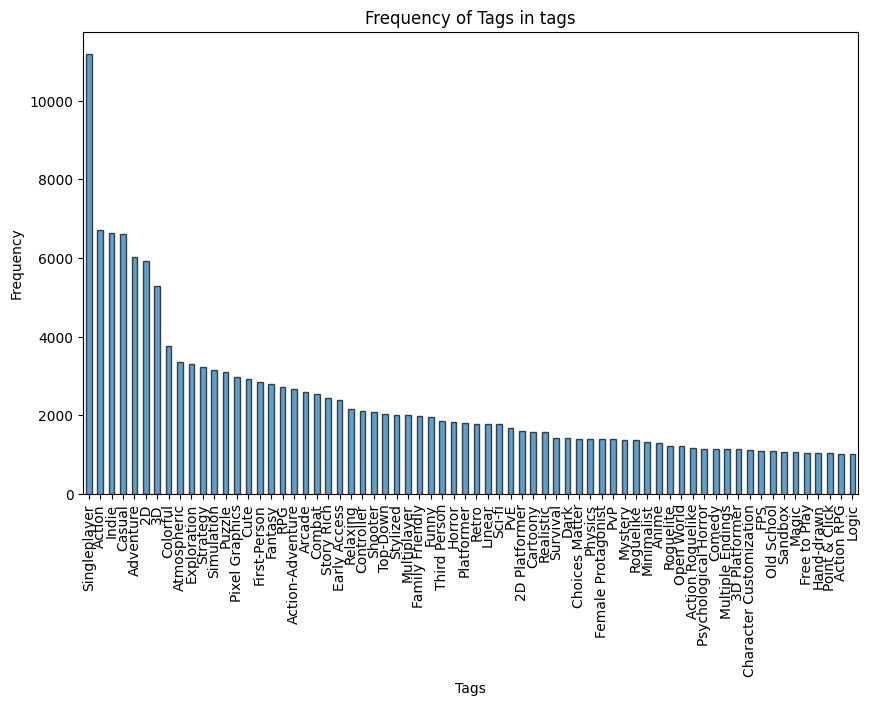

In [122]:
# Plot a frequency histogram.
plt.figure(figsize=(10, 6))
tag_freq[tag_freq>=1000].plot(kind='bar', edgecolor='black', alpha=0.7)

# Add a title and labels.
plt.title('Frequency of Tags in tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.savefig('Freq_gt1000.png')

# Display the figure.
plt.show()

In [131]:
tag_freq[tag_freq>=3000]

value
Singleplayer    11197
Action           6712
Indie            6634
Casual           6604
Adventure        6015
2D               5925
3D               5297
Colorful         3762
Atmospheric      3366
Exploration      3308
Strategy         3237
Simulation       3154
Puzzle           3109
Name: count, dtype: int64

In [110]:
# Set a frequency threshold and remove tags that occur less frequently than this threshold.
threshold = 3500
common_tags = tag_freq[tag_freq >= threshold].index


info_tags_filtered = info_tags
# Filter out rare tags.
for col in tag_list:
    info_tags_filtered[col] = info_tags[col].apply(lambda x: x if x in common_tags else None)

all_tags_filtered = info_tags_filtered.melt(value_vars=tag_list)['value']

# Calculate frequency of filtered tags.
tag_freq_filtered = all_tags_filtered.value_counts()
tag_freq_filtered

value
Singleplayer    11197
Action           6712
Indie            6634
Casual           6604
Adventure        6015
2D               5925
3D               5297
Colorful         3762
Name: count, dtype: int64

In [50]:
len(tag_freq_filtered)

8

In [15]:
for i in range(37):
    col = f'tag_{i+1}'
    print(f"Unique tags in col {col}:",len(info_tags_filtered[col].unique()))

Unique tags in col tag_1: 8
Unique tags in col tag_2: 9
Unique tags in col tag_3: 9
Unique tags in col tag_4: 9
Unique tags in col tag_5: 7
Unique tags in col tag_6: 7
Unique tags in col tag_7: 7
Unique tags in col tag_8: 6
Unique tags in col tag_9: 6
Unique tags in col tag_10: 5
Unique tags in col tag_11: 5
Unique tags in col tag_12: 5
Unique tags in col tag_13: 5
Unique tags in col tag_14: 4
Unique tags in col tag_15: 3
Unique tags in col tag_16: 3
Unique tags in col tag_17: 3
Unique tags in col tag_18: 3
Unique tags in col tag_19: 2
Unique tags in col tag_20: 2
Unique tags in col tag_21: 2
Unique tags in col tag_22: 2
Unique tags in col tag_23: 2
Unique tags in col tag_24: 2
Unique tags in col tag_25: 1
Unique tags in col tag_26: 1
Unique tags in col tag_27: 2
Unique tags in col tag_28: 1
Unique tags in col tag_29: 1
Unique tags in col tag_30: 1
Unique tags in col tag_31: 2
Unique tags in col tag_32: 1
Unique tags in col tag_33: 1
Unique tags in col tag_34: 1
Unique tags in col tag_

In [16]:
len(info_tags_filtered)

14685

value
Singleplayer    11197
Action           6712
Indie            6634
Casual           6604
Adventure        6015
2D               5925
3D               5297
Colorful         3762
Name: count, dtype: int64


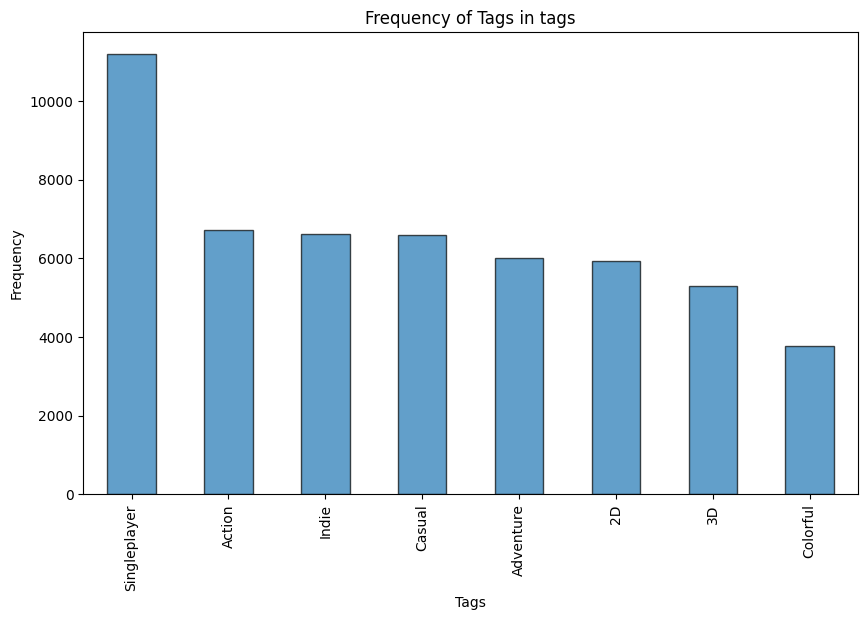

In [18]:
print(tag_freq_filtered)

# Plot a frequency histogram.
plt.figure(figsize=(10, 6))
tag_freq_filtered.plot(kind='bar', edgecolor='black', alpha=0.7)

# Add a title and labels.
plt.title('Frequency of Tags in tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')

# Display the figure.
plt.show()

## Multi-label Binarization

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MultiLabelBinarizer

# Combine the tag columns into a single list and remove None values.
info_tags_final = info_tags_filtered

info_tags_final['tags'] = info_tags_filtered[tag_list].values.tolist()
info_tags_final['tags'] = info_tags_filtered['tags'].apply(lambda x: [tag for tag in x if tag is not None])

# Convert tags to multi-label binary encoding.
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(info_tags_final['tags'])

# Combine filenames and tags.
info_tags_final = info_tags_final.drop(columns=tag_list)
info_tags_final = info_tags_final.join(pd.DataFrame(tags_encoded, columns=mlb.classes_))
info_tags_final = info_tags_final.dropna(subset=mlb.classes_)

info_tags_final.head()

,appid,release,title,price,sentiment,reviews,percentage,screenshots,tags,2D,3D,Action,Adventure,Casual,Colorful,Indie,Singleplayer
0,2805630,2024-02-24,BotMobile,1173,Positive,10,100,[2805630_ss_02b69bffacf19807fb6202fb8167fad7e0...,"[Action, Adventure, Casual, Singleplayer]",0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2805610,2024-02-24,Just skill shooter 3: 2d edition,199,Positive,11,90,[2805610_ss_21f5dfd4d369f1cefdd9d233f574a4758d...,"[2D, Action, Adventure, Casual, Colorful]",1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2816420,2024-02-24,Slime Drop,199,None,None,NaN,[2816420_ss_649a6c5bb66b93bf7b0a384d412923618d...,"[2D, Casual, Colorful, Indie, Singleplayer]",1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,2815670,2024-02-24,Path to the Creator,299,None,None,NaN,[2815670_ss_06c8a39fd0618390bdedaff037f2463ca4...,"[2D, Adventure]",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2776190,2024-02-24,Crowd Control VR,1179,None,None,NaN,[2776190_ss_01d6152f8e559e051312ea5e6232ba1ecb...,[Casual],0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
info_tags_full = info_tags_final.explode("screenshots")
info_tags_full.shape

(128528, 17)

# Model Building and Training

## Splitting data into training set and test set

In [32]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(info_tags_full, groups=info_tags_full['appid']))

train_df = info_tags_full.iloc[train_idx]
test_df = info_tags_full.iloc[test_idx]

## Creating Data Generator 

In [34]:
# Defining data generator
datagen = ImageDataGenerator(rescale=1.0/255)

# Generating training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=file_path,  # Image directory path
    x_col='screenshots',
    y_col=list(mlb.classes_),
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224, 224)
)

# Generating validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=file_path,  # Image directory path.
    x_col='screenshots',
    y_col=list(mlb.classes_),
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224, 224)
)

Found 102660 validated image filenames.
Found 25868 validated image filenames.


## Classical CNN model

### Model building

In [89]:
## CNN model

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

input_img = Input(shape=(224, 224, 3))

# CNN (Convolutional Neural Network)
# Convolutional layer and pooling layer
x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01))(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Multi-label output layer
output = Dense(len(mlb.classes_), activation='sigmoid', kernel_regularizer=l2(0.01))(x)

# Create and compile the model.
CNN_model = Model(inputs=input_img, outputs=output)
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
CNN_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','AUC','Precision','Recall'])

# Model structure summary
CNN_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,424 (91.20 MB)

 Trainable params: 23,908,424 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model trainning

In [90]:
# Defining the learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Model training
CNN_history = CNN_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 1802s 560ms/step - AUC: 0.6170 - Precision: 0.6151 - Recall: 0.3212 - accuracy: 0.0168 - loss: 0.9869 - val_AUC: 0.6387 - val_Precision: 0.7720 - val_Recall: 0.2164 - val_accuracy: 0.0143 - val_loss: 0.6530 - learning_rate: 1.0000e-04
Epoch 2/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 1729s 538ms/step - AUC: 0.6277 - Precision: 0.7390 - Recall: 0.2235 - accuracy: 0.0142 - loss: 0.6570 - val_AUC: 0.6401 - val_Precision: 0.7720 - val_Recall: 0.2164 - val_accuracy: 0.0143 - val_loss: 0.6489 - learning_rate: 1.0000e-04
Epoch 3/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 1730s 538ms/step - AUC: 0.6292 - Precision: 0.7603 - Recall: 0.2147 - accuracy: 0.0142 - loss: 0.6535 - val_AUC: 0.6412 - val_Precision: 0.7720 - val_Recall: 0.2164 - val_accuracy: 0.0143 - val_loss: 0.6482 - learning_rate: 1.0000e-04
Epoch 4/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 1879s 585ms/step - AUC: 0.6304 - Precision: 0.7615 - Recall: 0.2150 - accuracy: 0.0141 - loss: 0.6523 - val_AUC: 0.6410 - val_P

### Saving Model

In [91]:
# Saving model locally
CNN_model.save('CNN_model_tags.keras')

### Plotting the model performance

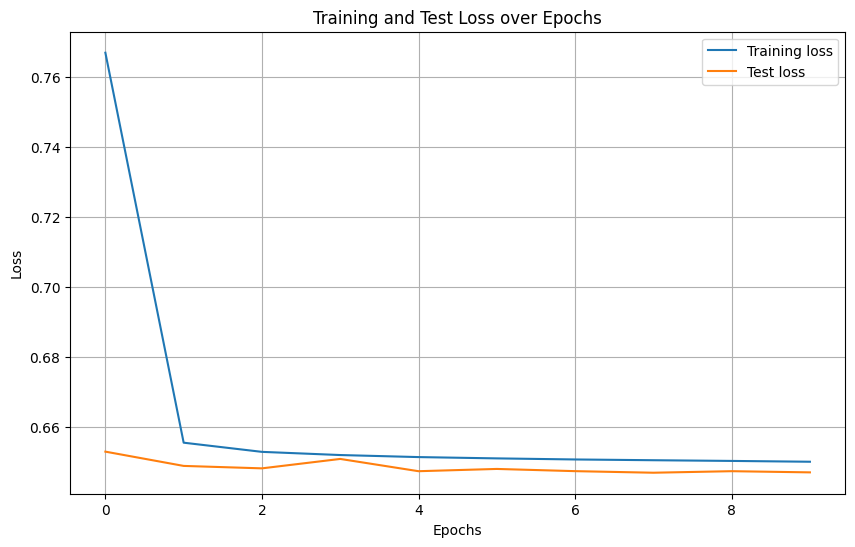

In [97]:
# Extracting training and testing loss
train_loss = CNN_history.history['loss']
val_loss = CNN_history.history['val_loss']

# Plotting training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('CNN_loss.png')
plt.show()

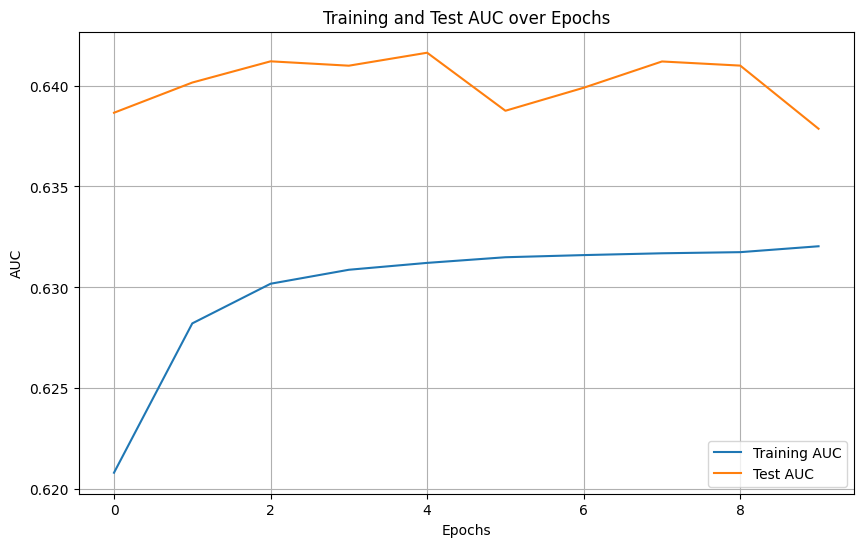

In [98]:
# Extracting training and testing AUC
train_loss = CNN_history.history['AUC']
val_loss = CNN_history.history['val_AUC']

# Plotting training and testing AUC
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training AUC')
plt.plot(val_loss, label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Test AUC over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('CNN_AUC.png')
plt.show()

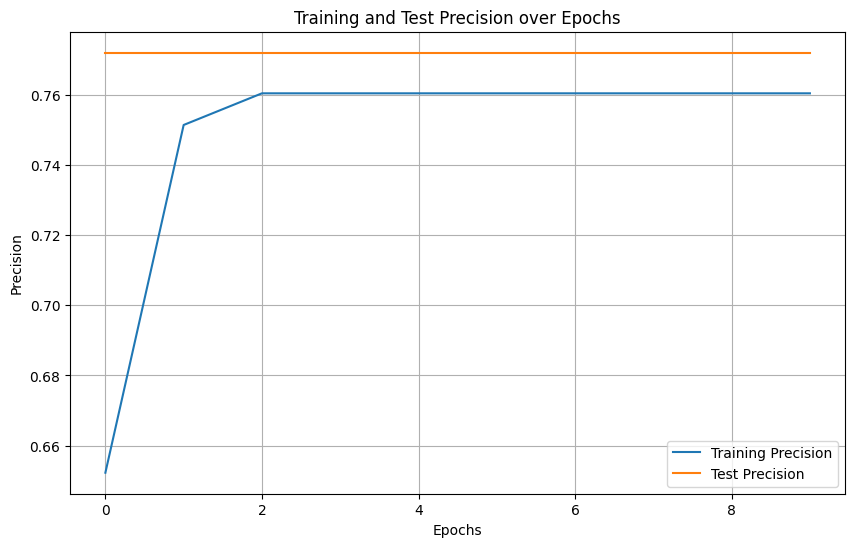

In [99]:
# Extracting training and testing precision
train_loss = CNN_history.history['Precision']
val_loss = CNN_history.history['val_Precision']

# Plotting training and testing precision
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Precision')
plt.plot(val_loss, label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Test Precision over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('CNN_Precision.png')
plt.show()

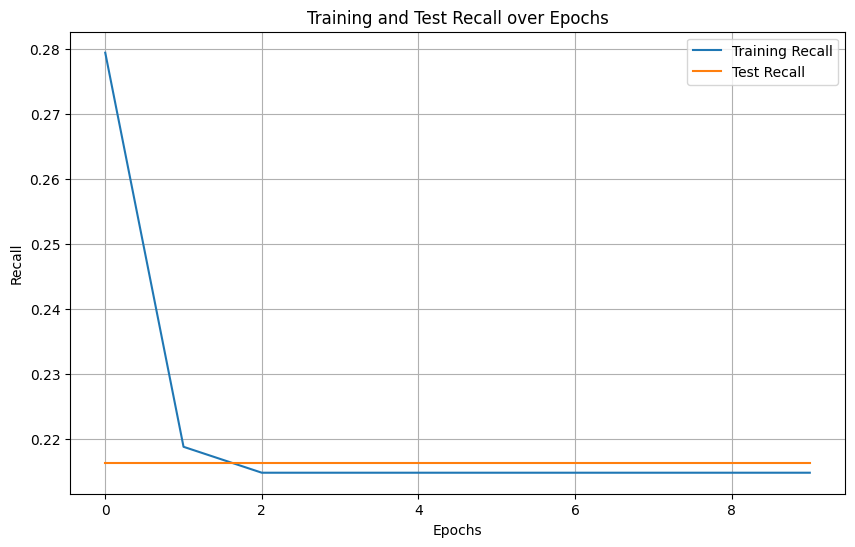

In [100]:
# Extracting training and testing recall
train_loss = CNN_history.history['Recall']
val_loss = CNN_history.history['val_Recall']

# Plotting training and testing precision
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Recall')
plt.plot(val_loss, label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Test Recall over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('CNN_Recall.png')
plt.show()

## Pre-trained models

### Building pre-trained ResNet50 model

In [123]:
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the pre-trained ResNet50 model without the top fully connected layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model.
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Multi-label output layer.
output = Dense(len(mlb.classes_), activation='sigmoid')(x)

# Create and compile the model.
ResNet50_model = Model(inputs=base_model.input, outputs=output)
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
ResNet50_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','AUC','Precision','Recall'])

# Model structure summary
ResNet50_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,640,904 (94.00 MB)

 Trainable params: 1,053,192 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Model training

In [124]:
# Defining the learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Model training
ResNet50_history = ResNet50_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 2616s 814ms/step - AUC: 0.6181 - Precision: 0.6292 - Recall: 0.3064 - accuracy: 0.0187 - loss: 0.6616 - val_AUC: 0.6366 - val_Precision: 0.7720 - val_Recall: 0.2164 - val_accuracy: 0.0143 - val_loss: 0.6467 - learning_rate: 1.0000e-04
Epoch 2/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 2617s 815ms/step - AUC: 0.6291 - Precision: 0.7230 - Recall: 0.2324 - accuracy: 0.0145 - loss: 0.6505 - val_AUC: 0.6392 - val_Precision: 0.7719 - val_Recall: 0.2164 - val_accuracy: 0.0143 - val_loss: 0.6472 - learning_rate: 1.0000e-04
Epoch 3/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 2614s 814ms/step - AUC: 0.6311 - Precision: 0.7436 - Recall: 0.2229 - accuracy: 0.0136 - loss: 0.6503 - val_AUC: 0.6407 - val_Precision: 0.7714 - val_Recall: 0.2166 - val_accuracy: 0.0143 - val_loss: 0.6468 - learning_rate: 1.0000e-04
Epoch 4/10
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 2613s 813ms/step - AUC: 0.6313 - Precision: 0.7541 - Recall: 0.2185 - accuracy: 0.0134 - loss: 0.6502 - val_AUC: 0.6392 - val_P

In [132]:
# Saving model
ResNet50_model.save('ResNet50_model_tags.keras')

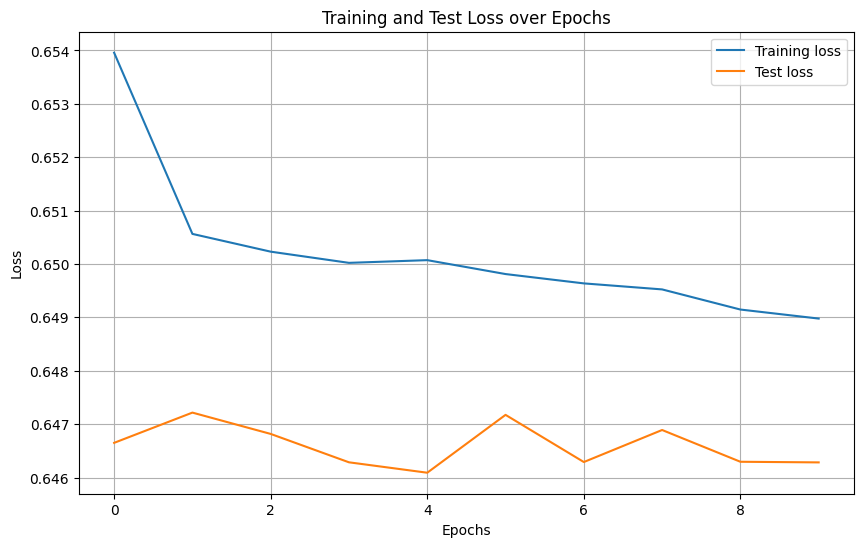

In [125]:
# Extracting training and testing loss
train_loss = ResNet50_history.history['loss']
val_loss = ResNet50_history.history['val_loss']

# Plotting training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ResNet50_loss.png')
plt.show()

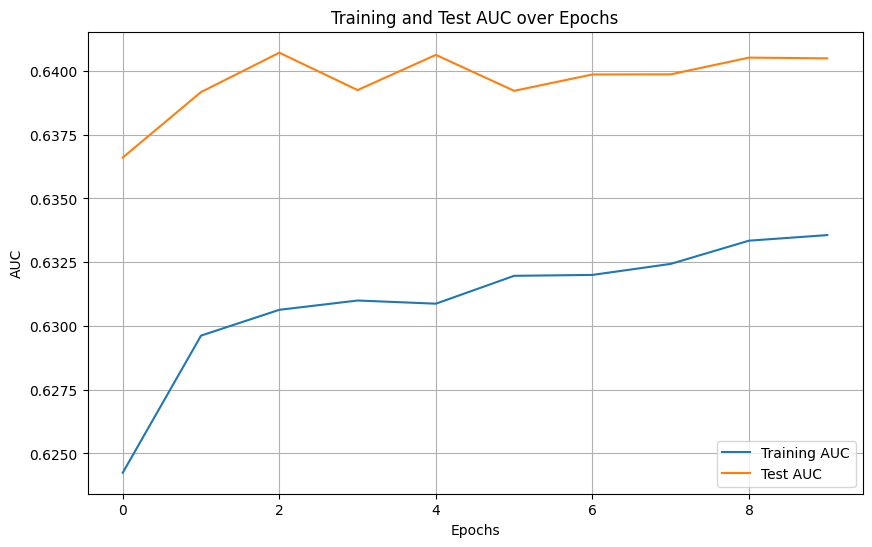

In [126]:
# Extracting training and testing AUC
train_loss = ResNet50_history.history['AUC']
val_loss = ResNet50_history.history['val_AUC']

# Plotting training and testing AUC
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training AUC')
plt.plot(val_loss, label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Test AUC over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ResNet50_AUC.png')
plt.show()

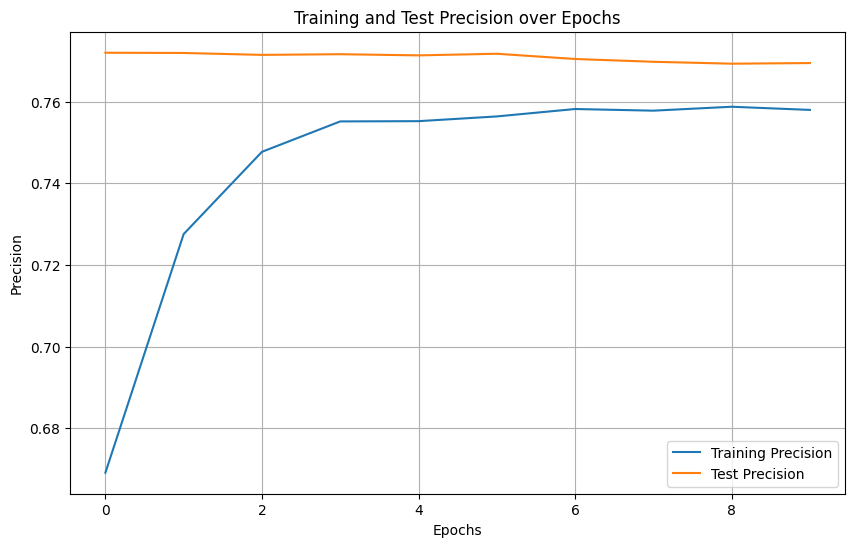

In [127]:
#Extracting training and testing Precision
train_loss = ResNet50_history.history['Precision']
val_loss = ResNet50_history.history['val_Precision']

# Plotting training and testing loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Precision')
plt.plot(val_loss, label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Test Precision over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ResNet50_Precision.png')
plt.show()

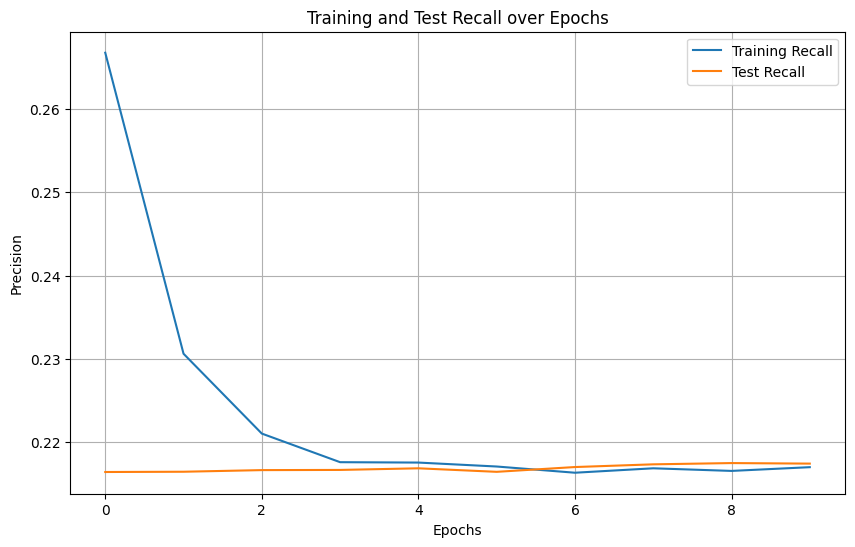

In [128]:
# Extracting training and testing recall
train_loss = ResNet50_history.history['Recall']
val_loss = ResNet50_history.history['val_Recall']

# Extracting training and testing recall
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Recall')
plt.plot(val_loss, label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Test Recall over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ResNet50_Recall.png')
plt.show()

## Evaluate model prediction performance

### CNN model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


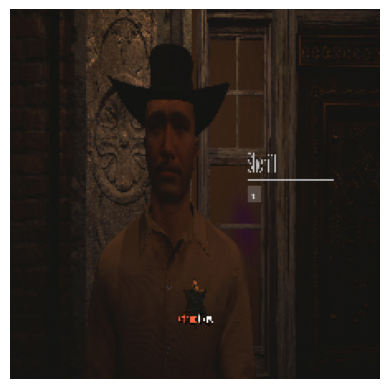

                 2D        3D    Action  Adventure    Casual  Colorful   
Actual     0.000000  1.000000  1.000000   1.000000  0.000000  0.000000  \
Predicted  0.403678  0.355791  0.451989   0.393192  0.443227  0.252715   

              Indie  Singleplayer  
Actual     0.000000      0.000000  
Predicted  0.448012      0.769735  


In [157]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

test_image1 = test_df['screenshots'].iloc[1]
test_image2 = test_df['screenshots'].iloc[-1]

CNN_model_path = 'CNN_model_tags.keras'
image_path1 = 'images/' + test_image1
image_path2 = 'images/' + test_image2
input_size = (224, 224)  

# Loading the trained model
CNN_model = load_model(CNN_model_path)

# Loading and preprocessing the image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Adding batch dimension
    image_array /= 255.0  # Normalizing to [0, 1]
    return image_array

# Processing the image
image_array1 = preprocess_image(image_path1, input_size)

# Using the model to make predictions
predicted_labels1 = CNN_model.predict(image_array)
actual_labels1 = test_df.iloc[1][mlb.classes_].values
results_df1 = pd.DataFrame([actual_labels1, predicted_labels1[0]], index=['Actual', 'Predicted'], columns=mlb.classes_)

# Plotting the image
plt.imshow(load_img(image_path1, target_size=input_size))
plt.axis('off')
plt.savefig('Predict_image_1.png')
plt.show()
print(results_df1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


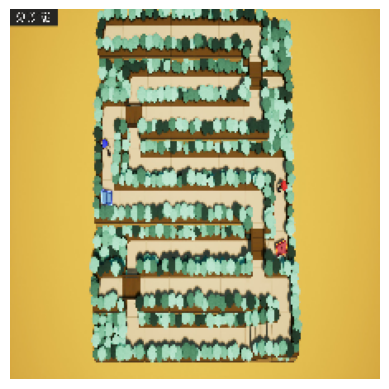

                 2D        3D    Action  Adventure    Casual  Colorful   
Actual     1.000000  0.000000  0.000000   1.000000  0.000000  0.000000  \
Predicted  0.403678  0.355791  0.451989   0.393192  0.443227  0.252715   

              Indie  Singleplayer  
Actual     1.000000      1.000000  
Predicted  0.448012      0.769735  


In [158]:
# Processing the image
image_array2 = preprocess_image(image_path2, input_size)

# Using the model to make predictions
predicted_labels2 = CNN_model.predict(image_array)
actual_labels2 = test_df.iloc[-1][mlb.classes_].values
results_df2 = pd.DataFrame([actual_labels2, predicted_labels2[0]], index=['Actual', 'Predicted'], columns=mlb.classes_)

# Plotting the image
plt.imshow(load_img(image_path2, target_size=input_size))
plt.axis('off')
plt.savefig('Predict_image_2.png')
plt.show()
print(results_df2)

### Pre-trained ResNet50 model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


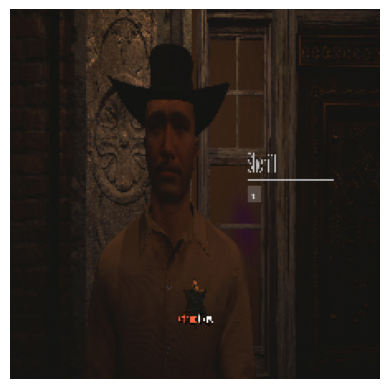

                 2D        3D    Action  Adventure    Casual  Colorful   
Actual     0.000000  1.000000  1.000000   1.000000  0.000000  0.000000  \
Predicted  0.394315  0.372934  0.464226   0.406411  0.443189  0.265936   

              Indie  Singleplayer  
Actual     0.000000      0.000000  
Predicted  0.445986      0.750602  


In [159]:
# Loading the trained model
Res_model_path = 'ResNet50_model_tags.keras'
Res_model = load_model(Res_model_path)

# Loading and preprocessing the image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Adding batch dimension
    image_array /= 255.0  # Normalizing to [0, 1]
    return image_array

# Processing the image
image_array1 = preprocess_image(image_path1, input_size)

# Using the model to make predictions
predicted_labels1 = Res_model.predict(image_array)
actual_labels1 = test_df.iloc[1][mlb.classes_].values
results_df1 = pd.DataFrame([actual_labels1, predicted_labels1[0]], index=['Actual', 'Predicted'], columns=mlb.classes_)

# Plotting the image
plt.imshow(load_img(image_path1, target_size=input_size))
plt.axis('off')
plt.savefig('Predict_image_1.png')
plt.show()
print(results_df1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


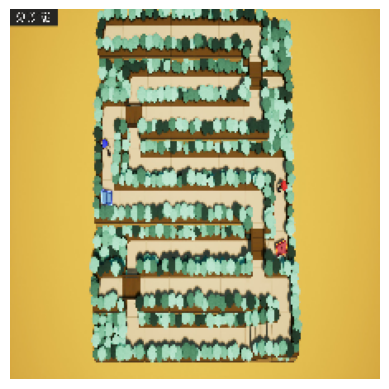

                 2D        3D    Action  Adventure    Casual  Colorful   
Actual     1.000000  0.000000  0.000000   1.000000  0.000000  0.000000  \
Predicted  0.394315  0.372934  0.464226   0.406411  0.443189  0.265936   

              Indie  Singleplayer  
Actual     1.000000      1.000000  
Predicted  0.445986      0.750602  


In [160]:
# Processing the image
image_array2 = preprocess_image(image_path2, input_size)

# Using the model to make predictions
predicted_labels2 = Res_model.predict(image_array)
actual_labels2 = test_df.iloc[-1][mlb.classes_].values
results_df2 = pd.DataFrame([actual_labels2, predicted_labels2[0]], index=['Actual', 'Predicted'], columns=mlb.classes_)

# Plotting the image
plt.imshow(load_img(image_path2, target_size=input_size))
plt.axis('off')
plt.savefig('Predict_image_2.png')
plt.show()
print(results_df2)